# Newton's Method

The goal of this notebook is to show some examples of using Python to implement Newton's Method, which attempts to approximate a root of a given function.

## Mathematical Introduction to Newton's Method

Newton's Method is a beautiful application of calculus, but for purposes of time, it is a topic which is often skipped over in calculus courses.  Here is a video introducing Newton's Method, by Yasmeen Baki.

<iframe width="560" height="315" src="https://www.youtube.com/embed/Mqf7XumTvbg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Applying at a good point

<iframe width="560" height="315" src="https://www.youtube.com/embed/O_HhCf9s3F8" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Newton's Method is what's called an *iterative* method, in that we start with a value, and then iteratively generate new values from the previous value.  How well Newton's Method works depends greatly on the value we start with.  In this section, we will consider an example where Newton's Method works well.

* Let $f(x) = x^3 - 2x + 2$.  Starting at $x_0 = -1.5$, apply Newton's method three times to estimate a root of $f$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

The goal of Newton's Method is to approximate a root of a given function $f$.  To apply Newton's Method, we need both $f$ and the derivative of $f$.  In this case, we are just going to explicitly write out the derivative of $f$.

In [2]:
f = lambda x: x**3 - 2*x + 2

In [3]:
df = lambda x: 3*x**2 - 2

The iterative formula for Newton's Method is $z \leadsto z - f(z)/f'(z)$.  At each stage of Newton's Method, we have some approximate root $z$, and for the next stage we will use $z - f(z)/f'(z)$ as our approximate root.  We define this function in the next cell.

In [4]:
newt = lambda z: z - f(z)/df(z)

We want to apply Newton's method three times, starting at $x_0 = -1.5$.  We will hold the successive values in a length-4 NumPy array `arr`.  The zeroth element in `arr` will be `-1.5`.

In [5]:
z = -1.5

reps = 3
arr = np.zeros(reps+1)
arr[0] = z

The zeros in `arr` are just place-holders.

In [6]:
arr

array([-1.5,  0. ,  0. ,  0. ])

Because we have already defined `newt` above, it is very easy to fill in the subsequent values produced by Newton's Method.  (I don't see a way to find these numbers using, for example, list comprehension in place of the for loop.)

In [7]:
for i in range(reps):
    arr[i+1] = newt(arr[i])

In good situations, the values produced by Newton's Method will be getting gradually closer to an actual root of $f$.

In [8]:
arr

array([-1.5       , -1.84210526, -1.77282692, -1.76930129])

As a reality check, let's see if `newt(arr[2])` is actually `arr[3]`.

In [9]:
newt(-1.77282692)

-1.7693012925504912

To get a sense for what Newton's Method is doing, let's plot $y = f(x)$.  We will use one of the pre-defined styles mentioned in a previous section.

In [11]:
plt.style.use('seaborn-darkgrid')

Looking at the graph, it is clear that this cubic polynomial has only one root, and it looks to be at approximately $x \approx -1.8$.  You should imagine starting at $(-1.5, f(-1.5))$, drawing the tangent line to $y = f(x)$ at that point, and finding the root of the tangent line (i.e., finding where the tangent line crosses the $x$-axis).  According to our implementation above, the tangent line should cross the $x$-axis at approximately $x = -1.842$.

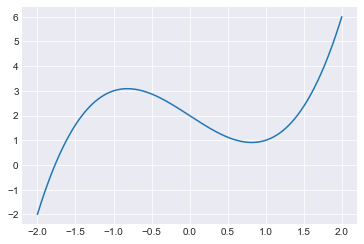

In [12]:
fig, ax = plt.subplots()

x = np.linspace(-2,2,1000)
ax.plot(x, f(x))

Let's actually apply `f` to the elements in `arr` and see if the outputs are getting closer and closer to 0.  (One of the reasons we made `arr` as a NumPy array, as opposed to a list, is so that we could make this evaluation using `f(arr)`.  That syntax would not work if `arr` were a list.)  In this case, `f(arr[3])` is $-0.00006605...$, so by the third iteration of Newton's Method, we have indeed gotten very close to an actual root of $f$.

In [13]:
f(arr)

array([ 1.62500000e+00, -5.66700685e-01, -2.61909903e-02, -6.60651520e-05])

## Applying at a worse point

<iframe width="560" height="315" src="https://www.youtube.com/embed/0ZhC0g1ax1M" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

As mentioned above, the success of Newton's Method depends heavily on the starting point.  In this section, we will see some of what can go wrong if we do not begin at a good point.

* Let $f(x) = x^3 - 2x + 2$.  Starting at $x_0 = -0.5$, apply Newton's method three times to estimate a root of $f$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

We will use the same setup as in the previous ssection.

In [2]:
f = lambda x: x**3 - 2*x + 2
df = lambda x: 3*x**2 - 2

newt = lambda z: z - f(z)/df(z)

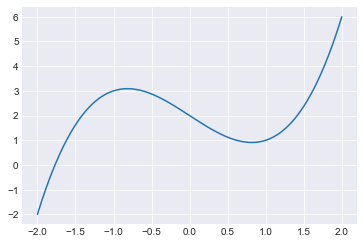

In [3]:
x = np.linspace(-2,2,1000)

fig, ax = plt.subplots()
ax.plot(x, f(x))

Again, this code is all the same as in the previous section, with the exception of the fact that we start here at -0.5 instead of at -1.5.

In [4]:
z = -0.5

reps = 3

arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    arr[i+1] = newt(arr[i])

In [5]:
arr

array([-0.5       ,  1.8       ,  1.25181347,  0.71203147])

As a reality check, we make sure that `newt(arr[1])` really is `arr[2]`.

In [6]:
newt(1.8)

1.2518134715025906

We will get a much better sense of Newton's Method if we can draw tangent lines.  The following function takes as input an $x$-value `x0` and as output returns the function corresponding to the tangent line of `f` at `x0`.

In [7]:
def tang(x0):
    return lambda x: df(x0)*(x-x0)+f(x0)

For each of our three iterations of Newton's method, we draw the corresponding tangent line using `ax.plot(x, tang(arr[i])(x))` and we draw a bullet point at the corresponding root estimate (i.e., where the tangent line crosses the $x$-axis) using `ax.plot(arr[i+1],0,'ko')`.  The syntax `'ko'`, standing for "black circle" marker, might look familiar from Matlab.  Instead of letting Matplotlib automatically choose the ranges for `x` and `y`, we set them explicitly using `ax.set(xlim=(-1,2), ylim=(-2,3.5))`.

It's worth staring at the resulting plot and understanding how what it shows relates to the values in `arr`.

[(-1.0, 2.0), (-2.0, 3.5)]

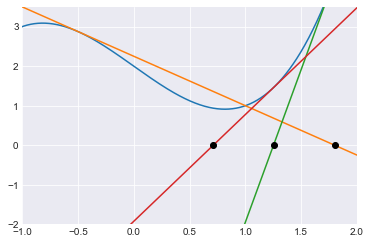

In [11]:
x = np.linspace(-2,2,1000)

fig, ax = plt.subplots()
ax.plot(x, f(x))

z = -0.5

reps = 3

arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    ax.plot(x, tang(arr[i])(x))
    arr[i+1] = newt(arr[i])
    ax.plot(arr[i+1],0,'ko')
    
ax.set(xlim=(-1,2), ylim=(-2,3.5))

Let's use the exact same code but with 10 iterations of Newton's Method.  Notice how we don't seem to be converging on the an actual root, even after 10 iterations.

[(-1.0, 2.0), (-2.0, 3.5)]

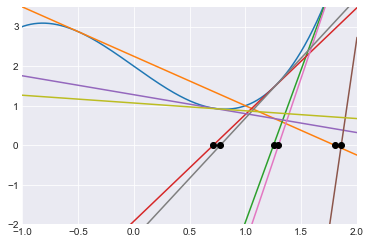

In [12]:
x = np.linspace(-2,2,1000)

fig, ax = plt.subplots()
ax.plot(x, f(x))

z = -0.5

reps = 10

arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    ax.plot(x, tang(arr[i])(x))
    arr[i+1] = newt(arr[i])
    ax.plot(arr[i+1],0,'ko')
    
ax.set(xlim=(-1,2), ylim=(-2,3.5))

On the other hand, if we choose a better starting point like -1.5, then we very quickly converge on the actual root.  The following chart includes 10 iterations of Newton's Method, but most of these iterations are so close to each other that we can't distinguish between them.

[(-2.0, -1.0), (-2.0, 3.5)]

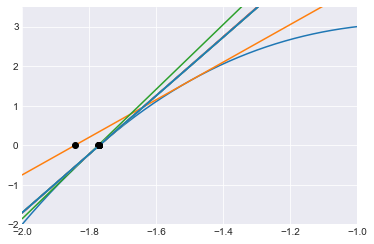

In [13]:
x = np.linspace(-2,2,1000)

fig, ax = plt.subplots()
ax.plot(x, f(x))

z = -1.5

reps = 10

arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    ax.plot(x, tang(arr[i])(x))
    arr[i+1] = newt(arr[i])
    ax.plot(arr[i+1],0,'ko')
    
ax.set(xlim=(-2,-1), ylim=(-2,3.5))

If we instead start at 0 for this function $f$, we find another example of what can go wrong when applying Newton's Method.  In this case, Newton's Method oscillates forever between 0 and 1, neither of which is anywhere near the actual root.

[(-2.0, 2.0), (-2.0, 3.5)]

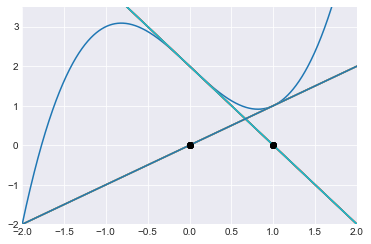

In [15]:
x = np.linspace(-2,2,1000)

fig, ax = plt.subplots()
ax.plot(x, f(x))

z = 0

reps = 10

arr = np.zeros(reps+1)
arr[0] = z

for i in range(reps):
    ax.plot(x, tang(arr[i])(x))
    arr[i+1] = newt(arr[i])
    ax.plot(arr[i+1],0,'ko')
    
ax.set(xlim=(-2,2), ylim=(-2,3.5))

In [16]:
arr

array([0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.])

In [17]:
f(arr)

array([2., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2.])

## Analyzing Newton's method

<iframe width="560" height="315" src="https://www.youtube.com/embed/ZaT6p2ZAC90" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

We've seen one starting value where Newton's Method works well, and we've seen two starting values where Newton's Method does not work well.  Here we are going to investigate Newton's Method more systematically.

* Let $f(x) = x^3 - 2x + 2$.  For each value of $z$ in `np.linspace(-2,2,100)`, apply Newton's method 7 times, and call the result $z_{7}$.  For how many of these 100 values do we have $-0.001 \leq f(z_{7}) \leq 0.001$?

The initial setup is the same as in the previous sections.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [2]:
f = lambda x: x**3 - 2*x + 2
df = lambda x: 3*x**2 - 2

newt = lambda z: z - f(z)/df(z)

Next we make the array that will hold the 100 starting values we will consider.

In [3]:
z = np.linspace(-2,2,100)

We will make a $100 \times 8$ NumPy array to hold the results.  We think of each row as holding a starting value as well as the first 7 applications of Newton's Method to that starting value.  We initialize all the values to 0.

In [4]:
reps = 7
arr = np.zeros((len(z), reps+1))

We fill in the zeroth column with the starting values, and then we one-by-one fill in the next columns using a for loop.  This code is very similar to what we did above, except instead of applying `newt` to a single entry, here we are applying `newt` to an entire column.

In [5]:
arr[:, 0] = z

for i in range(reps):
    arr[:, i+1] = newt(arr[:, i])

Here is what `arr` looks like.  For example, the top row of `arr` is saying that, if we start at $z_0 = -2$ and apply Newton's Method 7 times, we reach approximately $z_7 = -1.76929$.

In [6]:
arr

array([[-2.00000000e+00, -1.80000000e+00, -1.76994819e+00,
        -1.76929266e+00, -1.76929235e+00, -1.76929235e+00,
        -1.76929235e+00, -1.76929235e+00],
       [-1.95959596e+00, -1.79093206e+00, -1.76962110e+00,
        -1.76929243e+00, -1.76929235e+00, -1.76929235e+00,
        -1.76929235e+00, -1.76929235e+00],
       [-1.91919192e+00, -1.78321559e+00, -1.76942955e+00,
        -1.76929237e+00, -1.76929235e+00, -1.76929235e+00,
        -1.76929235e+00, -1.76929235e+00],
       [-1.87878788e+00, -1.77700676e+00, -1.76933475e+00,
        -1.76929236e+00, -1.76929235e+00, -1.76929235e+00,
        -1.76929235e+00, -1.76929235e+00],
       [-1.83838384e+00, -1.77248656e+00, -1.76929966e+00,
        -1.76929235e+00, -1.76929235e+00, -1.76929235e+00,
        -1.76929235e+00, -1.76929235e+00],
       [-1.79797980e+00, -1.76986592e+00, -1.76929259e+00,
        -1.76929235e+00, -1.76929235e+00, -1.76929235e+00,
        -1.76929235e+00, -1.76929235e+00],
       [-1.75757576e+00, -1.769392

We are interested in the results after the 7 applications of Newton's Method.  This corresponds to the last column of `arr`.  We store this last column with the variable name `results`.

In [7]:
results = arr[:, -1]

Let's get ready to plot the results.  First we plot $f$ over a slightly larger domain.

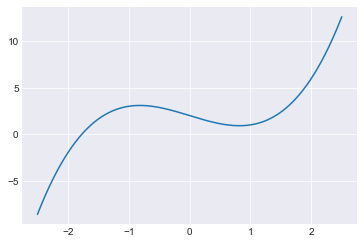

In [8]:
fig, ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x, f(x))

Here is the Boolean array corresponding to our condition $-0.001 \leq f(z_{7}) \leq 0.001$.  For example, the zeroth entry being `True` indicates that $z_0 = -2$ is a starting value for which this condition is satisfied.

In [9]:
good_bool = np.abs(f(results)) <= 0.001

In [10]:
good_bool

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True])

We are getting ready to plot the good starting values.  As a first step, we use Boolean indexing to select the starting values where the condition is satisfied: `pts = z[good_bool]`.

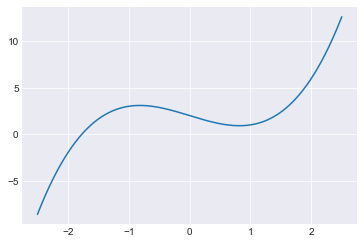

In [11]:
fig, ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x, f(x))

pts = z[good_bool]

This variable `pts` represents a one-dimensional NumPy array of length 32.

In [12]:
pts.shape

(32,)

Here we try to add in black bullet points along the $x$-axis at all of the good points.  The error message tells us that the error is in the last line `ax.plot(pts, 0, 'ko');`, and that the specific error is "ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)".

ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)

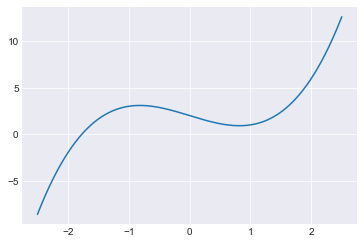

In [13]:
fig, ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x, f(x))

pts = z[good_bool]

ax.plot(pts, 0, 'ko');

We need to replace the single number `0` with a NumPy array of 32 zeros.  (A length 32 list would also work.)

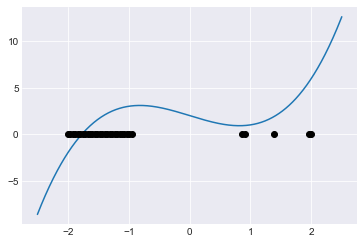

In [15]:
fig, ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x, f(x))

pts = z[good_bool]

ax.plot(pts, np.zeros(len(pts)), 'ko');

We make the bullet points a little smaller by setting a `markersize`.  (I just guessed-and-checked values to see what size looked good.)

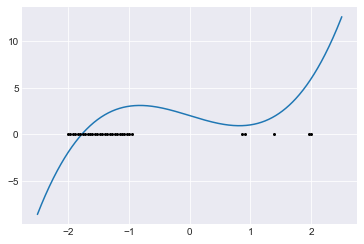

In [16]:
fig, ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x, f(x))

pts = z[good_bool]

ax.plot(pts, np.zeros(len(pts)), 'ko', markersize=2);

Let's make a similar plot for the bad points.  Here is a reminder of how `good_bool` looked.

In [18]:
good_bool

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True])

To take the elementwise negation of this Boolean array in Numpy, we use the tilde symbol `~`.

In [19]:
~good_bool

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False])

Here we use Boolean indexing with `~good_bool` to keep only the bad values from `z`.  We also change the color from black to red, by changing `k` to `r`.

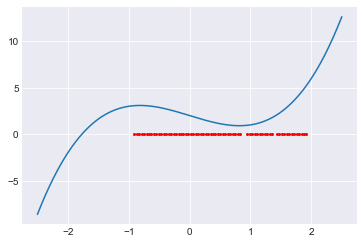

In [20]:
fig, ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x, f(x))

pts = z[~good_bool]

ax.plot(pts, np.zeros(len(pts)), 'ro', markersize=2);

Here is the same plot from above with the good values.

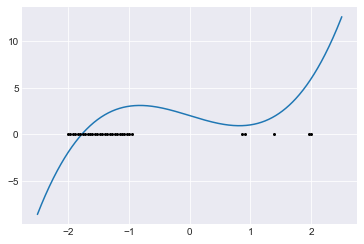

In [21]:
fig, ax = plt.subplots()
x = np.linspace(-2.5,2.5,1000)
ax.plot(x, f(x))

pts = z[good_bool]

ax.plot(pts, np.zeros(len(pts)), 'ko', markersize=2);

The plots say that, initially, all the starting values near -2 work well.  Once we pass the local maximum of $f$, after which Newton's Method starts moving us away from the root, we have mostly bad values.  There are a few outliers (good points surrounded by bad points).  It's worth looking at these outliers and thinking about the corresponding tangent lines.  Can you see why Newton's Method could work well for these particular values?  If we used more than 7 repetitions, we would see many more "good points" scattered throughout the bad points.